<a href="https://colab.research.google.com/github/CristobalMe/CV/blob/main/Actividad_2_2_Prueba_de_bondad_de_ajuste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 2.2 Prueba de bondad de ajuste**
# Cristobal Medina Meza | A01643121

H0: La variable "Tiempo entre pacientes (min)" tiene una distribucion exponencial \\
Ha: La variable "Tiempo entre pacientes (min)" **no** tiene una distribucion exponencial \\

Importamos las librerias necesarias


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

Cargamos el dataset e imprimimos las primeros 5 observaciones

In [12]:
df = pd.read_excel("Tiempo_IMSS.xlsx")

In [13]:
df.head()

,Num cliente,Tiempo entre pacientes (min)
0,1,1.571354
1,2,3.059371
2,3,1.010224
3,4,0.151390
4,5,3.817570


Revisamos que no existan datos nulos

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Num cliente                   125 non-null    int64  
 1   Tiempo entre pacientes (min)  125 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


Hacemos un histograma de la variable 'Tiempo entre pacientes (min)' para darnos una idea de su distribución

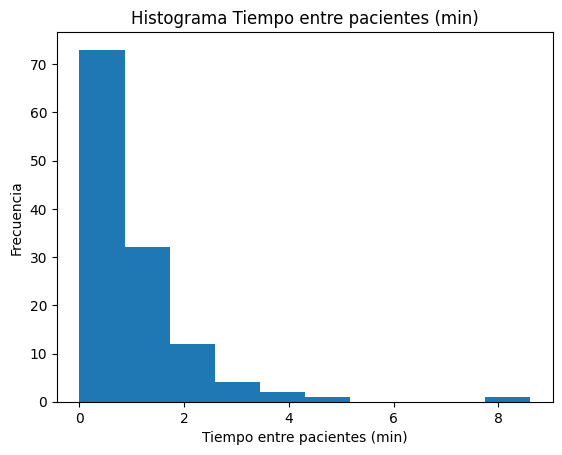

In [15]:
plt.hist(df['Tiempo entre pacientes (min)'])
plt.xlabel('Tiempo entre pacientes (min)')
plt.ylabel('Frecuencia')
plt.title('Histograma Tiempo entre pacientes (min)')
plt.show()

Se puede observar que se comporta similar a una exponencial, por lo que, necesitaremos calcular su lambda para compararla con sus cuartiles teoricos.

In [16]:
Lambda = 1 / (df['Tiempo entre pacientes (min)'].mean())
promedio = df['Tiempo entre pacientes (min)'].mean()
Lambda

0.9942952201280959

Hacemos un QQ-Plot para comparar nuestros datos con su distribucion teorica.

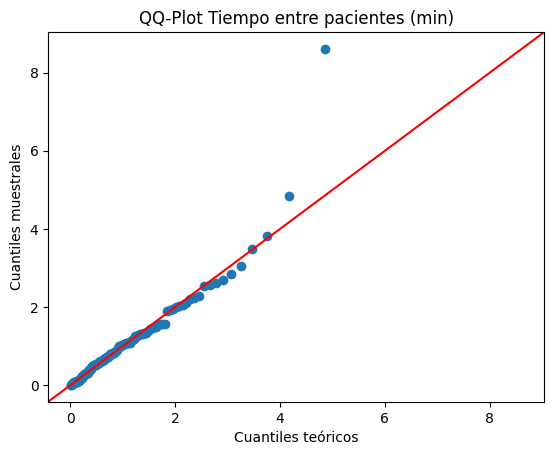

In [17]:
figura = sm.qqplot(df['Tiempo entre pacientes (min)'], stats.expon, line='45', scale=promedio)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.title('QQ-Plot Tiempo entre pacientes (min)')
plt.show()

Se observa que los datos se separan de la distribucion teorica al final, por lo que realizaremos un test de kolmogorov para comprobar nuestra hipotesis.

In [18]:
test_kolmogorov = stats.kstest(df['Tiempo entre pacientes (min)'], 'expon', args=(0, promedio))
test_kolmogorov

KstestResult(statistic=0.049634543889724325, pvalue=0.9025389164730768, statistic_location=1.5713537587752215, statistic_sign=1)

pvalue > 0.05. \\
Por lo tanto, se acepta H0 con un 95% de confianza.